In [1]:
import pandas as pd 
import numpy as np


In [2]:
import pandas_datareader as dt
import math
import talib
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import seaborn as sns



import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

import pandas_datareader as dt
import math

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import seaborn as sns


Using TensorFlow backend.


In [98]:
df= dt.DataReader('^GSPC', 'yahoo', start='1/1/1970')

In [99]:
df=df.reset_index()

In [100]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [101]:
import ta
f=ta.add_all_ta_features(df, 'Open', 'High', 'Low', 'Close', 'Volume', fillna=True)


c:\users\a\appdata\local\programs\python\python37\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [102]:
f

,Date,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,1970-01-02,93.540001,91.790001,0.000000,93.000000,8050000,93.000000,3.081992e+06,8050000,0.382856,...,-30.857195,0.000000,93.000000,0.000000,0.000000,0.000000,0.000000,-89.365366,0.000000,0.000000
1,1970-01-05,94.250000,92.529999,0.000000,93.459999,11490000,93.459999,4.017219e+06,19540000,0.205590,...,-32.113870,0.000000,93.207225,0.000000,3.304300,0.660860,2.643440,0.494623,0.493403,0.494623
2,1970-01-06,93.809998,92.129997,0.000000,92.820000,11460000,92.820000,1.970822e+06,8080000,0.063575,...,-58.130115,0.000000,93.034207,0.000000,5.667178,1.662123,4.005054,-0.684784,-0.687140,-0.193549
3,1970-01-07,93.379997,91.930000,0.000000,92.629997,10010000,92.629997,1.625628e+06,-1930000,0.039640,...,-65.853795,0.000000,92.854220,0.000000,6.092267,2.548152,3.544115,-0.204700,-0.204910,-0.397852
4,1970-01-08,93.470001,91.989998,0.000000,92.680000,10670000,92.680000,9.046949e+05,8740000,0.017506,...,-63.821150,0.000000,92.777753,0.000000,6.901134,3.418749,3.482386,0.053981,0.053967,-0.344086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12900,2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117,1.954934e+12,1385330470000,0.055274,...,-47.680122,57.976219,3902.994114,0.248729,1.082405,-0.548603,1.631008,0.125632,0.125553,4073.516255
12901,2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932,1.960323e+12,1391272820000,0.151259,...,-17.260444,48.171482,3903.364788,0.993093,2.075093,-0.023864,2.098957,1.135161,1.128767,4120.892400
12902,2021-02-25,3925.020020,3814.040039,3915.800049,3829.340088,6513060000,3829.340088,1.955605e+12,1384759760000,0.172152,...,-83.602578,37.690018,3897.687281,-2.202733,3.642464,0.709402,2.933063,-2.447881,-2.478339,4017.569987
12903,2021-02-26,3861.080078,3789.540039,3839.659912,3811.149902,6512950000,3811.149902,1.953027e+12,1378246810000,0.158478,...,-86.568539,18.310500,3888.346294,-2.558788,4.778945,1.523310,3.255634,-0.475021,-0.476153,3998.010648


In [103]:
# #RSI
# df['RSI']=talib.RSI(df['Close'],timeperiod=15)
# #MACD
# df['MACD'], df['MACD SIGNAL'], df['MACD HIST'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
# #MFI
# df['MFI'] = talib.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=14)
# #Momentum
# df['Momentum'] = talib.MOM(df['Close'], timeperiod=10)
# # Bollinger band
# df['upper bol'], df['middle bol'], df['lower bol'] = talib.BBANDS(df['Close'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
# #OBV
# df['OBV'] = talib.OBV(df['Close'], df['Volume'])
# #Hammer
# df['Hammer candle'] = talib.CDLHAMMER(df['Open'], df['High'],df['Low'], df['Close'])
# #hilberts dominant cycle
# df['Hil_tran_dom_cycle']=talib.HT_DCPERIOD(df['Close'])
# #inverted hammer
# df['Inverted Hammer candle'] = talib.CDLINVERTEDHAMMER(df['Open'], df['High'],df['Low'], df['Close'])

In [104]:
df=f.dropna()
df

,Date,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,1970-01-02,93.540001,91.790001,0.000000,93.000000,8050000,93.000000,3.081992e+06,8050000,0.382856,...,-30.857195,0.000000,93.000000,0.000000,0.000000,0.000000,0.000000,-89.365366,0.000000,0.000000
1,1970-01-05,94.250000,92.529999,0.000000,93.459999,11490000,93.459999,4.017219e+06,19540000,0.205590,...,-32.113870,0.000000,93.207225,0.000000,3.304300,0.660860,2.643440,0.494623,0.493403,0.494623
2,1970-01-06,93.809998,92.129997,0.000000,92.820000,11460000,92.820000,1.970822e+06,8080000,0.063575,...,-58.130115,0.000000,93.034207,0.000000,5.667178,1.662123,4.005054,-0.684784,-0.687140,-0.193549
3,1970-01-07,93.379997,91.930000,0.000000,92.629997,10010000,92.629997,1.625628e+06,-1930000,0.039640,...,-65.853795,0.000000,92.854220,0.000000,6.092267,2.548152,3.544115,-0.204700,-0.204910,-0.397852
4,1970-01-08,93.470001,91.989998,0.000000,92.680000,10670000,92.680000,9.046949e+05,8740000,0.017506,...,-63.821150,0.000000,92.777753,0.000000,6.901134,3.418749,3.482386,0.053981,0.053967,-0.344086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12900,2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117,1.954934e+12,1385330470000,0.055274,...,-47.680122,57.976219,3902.994114,0.248729,1.082405,-0.548603,1.631008,0.125632,0.125553,4073.516255
12901,2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932,1.960323e+12,1391272820000,0.151259,...,-17.260444,48.171482,3903.364788,0.993093,2.075093,-0.023864,2.098957,1.135161,1.128767,4120.892400
12902,2021-02-25,3925.020020,3814.040039,3915.800049,3829.340088,6513060000,3829.340088,1.955605e+12,1384759760000,0.172152,...,-83.602578,37.690018,3897.687281,-2.202733,3.642464,0.709402,2.933063,-2.447881,-2.478339,4017.569987
12903,2021-02-26,3861.080078,3789.540039,3839.659912,3811.149902,6512950000,3811.149902,1.953027e+12,1378246810000,0.158478,...,-86.568539,18.310500,3888.346294,-2.558788,4.778945,1.523310,3.255634,-0.475021,-0.476153,3998.010648


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000461E35C0>,
      dtype=object)

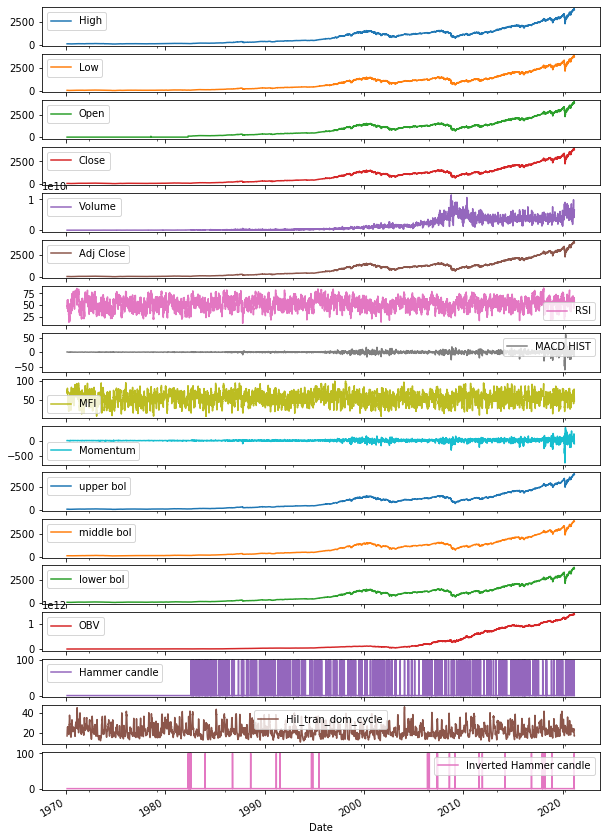

In [145]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(10, 16)
mpl.rcParams['axes.grid']=False
df[['High', 'Low','Open','Close','Volume','Adj Close','RSI','MACD HIST','MFI','Momentum','upper bol','middle bol','lower bol','OBV','Hammer candle','Hil_tran_dom_cycle','Inverted Hammer candle']].plot(subplots=True)

In [98]:
# df['Target']= np.where(df['Close'].shift(-1)> df['Close'],1,0)
# df

In [9]:
# #extract the dates
# train_dates=pd.to_datetime(df.index)


In [39]:
#variables for training
cols= list(df)[1:90]

In [40]:
df_for_training= df[cols].astype(float)

In [174]:
len(df_for_training)

12905

In [207]:
#Normalizing the data

# scaler=MinMaxScaler()
scaler=StandardScaler()
scaler=scaler.fit(df_for_training)
df_for_training_scaled= scaler.transform(df_for_training)

In [243]:
train_x=[]
train_y=[]

n_future=1
n_past=60# window

In [244]:
for i in range(n_past, len(df_for_training) - n_future+1):
    train_x.append(df_for_training_scaled[i-n_past:i, 0:df_for_training.shape[1]])
    train_y.append(df_for_training_scaled[i+n_future-1: i+n_future,5])

In [245]:
import numpy as np
train_x, train_y= np.array(train_x),np.array(train_y)

In [246]:
print('train x shape == {}'.format(train_x.shape))
print('train y shape == {}'.format(train_y.shape))

train x shape == (12845, 60, 89)
train y shape == (12845, 1)


# Model

In [247]:
# model=Sequential()
# model.add(LSTM(64, activation='relu', input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
# model.add(LSTM(32, activation='relu', return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(train_y.shape[1]))

# model= tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(64, activation='relu', input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True),
#     tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(train_y.shape[1])
# ])

# model.compile(optimizer='adam', loss='mse', metrics=['acc'])
# model.summary()

model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv1D(128, 150, input_shape= (win_length, num_features)))
model.add(tf.keras.layers.LSTM(128, input_shape= (train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 128)           111616    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 60, 128)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 128)           131584    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 60, 128)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [248]:
# history=model.fit(train_x, 
#                   train_y, 
#                   epochs=100, 
#                   batch_size=16, 
#                   validation_split=0.1,
#                  )

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_x, 
                    train_y,
                    epochs=25,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/25
402/402 [==============================] - 62s 137ms/step - loss: 0.0346 - mean_absolute_error: 0.1262
Epoch 2/25
402/402 [==============================] - 60s 149ms/step - loss: 0.0590 - mean_absolute_error: 0.1388
Epoch 3/25
402/402 [==============================] - 51s 126ms/step - loss: 0.6978 - mean_absolute_error: 0.4542
Epoch 4/25
402/402 [==============================] - 52s 129ms/step - loss: 0.2045 - mean_absolute_error: 0.2942
Epoch 5/25
402/402 [==============================] - 52s 128ms/step - loss: 1.1064 - mean_absolute_error: 0.6861
Epoch 6/25
402/402 [==============================] - 52s 130ms/step - loss: 2.5803 - mean_absolute_error: 1.1232
Epoch 7/25
402/402 [==============================] - 52s 130ms/step - loss: 1.7097 - mean_absolute_error: 0.9542
Epoch 8/25
402/402 [==============================] - 52s 129ms/step - loss: 0.5617 - mean_absolute_error: 0.5181
Epoch 9/25
402/402 [==============================] - 52s 129ms/step - loss: 0.4694 - me

In [54]:
model.save('trained_model_50_epochs.h5')

<Figure size 432x288 with 0 Axes>

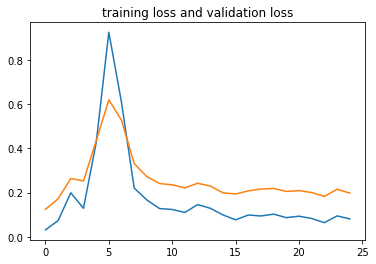

<Figure size 432x288 with 0 Axes>

In [249]:
import matplotlib.pyplot as plt


loss= history.history['loss']
mae= history.history['mean_absolute_error']
# acc= history.history['acc']
# val_acc=history.history['val_acc']

epochs= range(len(loss))

# plt.plot(epochs,acc)
# plt.plot(epochs,val_acc)
# plt.title('training accuracy and validation accuracy')
# plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,mae)
plt.title('training loss and validation loss')
plt.figure()

In [250]:
#get the dates for the next 90 days 
n_future=60
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

In [251]:
k=[1,2,3,4,5,6,7,8,9]
k[-3:]

[7, 8, 9]

In [252]:
train_x.shape

(12845, 60, 89)

In [253]:
#forecast the next 60 days
#pass the last 60 days as input

forecast= model.predict(train_x[-n_future:])


In [254]:
# transforming back to real values
# first lets change back the shape in order for inverse transform to pick up
forecast_copies= np.repeat(forecast, df_for_training.shape[1], axis=1)
y_pred_future= scaler.inverse_transform(forecast_copies)[:,0]

In [255]:
y_pred_future

array([3735.9749, 3749.2576, 3766.65  , 3759.9749, 3779.7612, 3792.1343,
       3814.394 , 3817.2417, 3808.7512, 3803.1584, 3779.6926, 3777.6277,
       3778.4133, 3797.6028, 3818.0188, 3803.2302, 3794.7554, 3780.3152,
       3768.8489, 3778.1904, 3785.9016, 3804.8071, 3818.0378, 3791.3977,
       3780.3452, 3782.2214, 3789.8853, 3801.6191, 3806.881 , 3812.4817,
       3833.9148, 3866.1243, 3847.5105, 3838.7114, 3850.6309, 3878.373 ,
       3885.978 , 3909.9885, 3885.702 , 3909.3325, 3881.2734, 3881.777 ,
       3859.0046, 3863.1533, 3864.4487, 3858.0461, 3866.0815, 3865.8918,
       3874.4631, 3879.37  , 3885.1343, 3903.466 , 3926.7249, 3943.2324,
       3951.3083, 3954.8708, 3947.043 , 3921.7554, 3898.5432, 3879.2126],
      dtype=float32)

In [256]:
forecast_dates=[]
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [257]:
df_forecast=pd.DataFrame({'Date':np.array(forecast_dates), 'Adj Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [258]:
df_forecast.head(5)

,Date,Adj Close
0,2021-03-01,3735.974854
1,2021-03-02,3749.257568
2,2021-03-03,3766.649902
3,2021-03-04,3759.974854
4,2021-03-05,3779.761230


c:\users\a\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\a\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


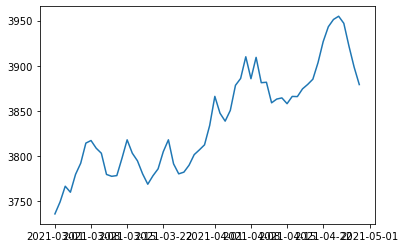

In [259]:
plt.plot(df_forecast['Date'], df_forecast['Adj Close'])

In [260]:
# df=df.reset_index()
original=df[[ 'Date','Adj Close']]
original['Date']=pd.to_datetime(original['Date'])
original=original.loc[original['Date'] >= '2021-2-1']


c:\users\a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


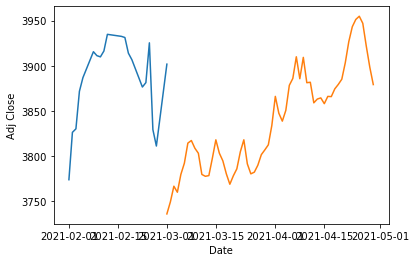

In [261]:
sns.lineplot(original['Date'], original['Adj Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Adj Close'])

- As we can see the trend forecast suggest that the price is overdue for a correction in the upcoming days.
- The forecast should not be used for trading purposes as it has not been optimised and still requires a lot of work